<a href="https://colab.research.google.com/github/hellojohnkim/mmai891/blob/main/24_891_John_Kim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 891: Individual Assignment

Version 1: Updated February 4, 2024

- John Kim
- 20439250
- MMAI 2024 891
- Genius Makers by Cade Metz
- Due April 21, 2024

# Preliminaries: Inspect and Set up environment

In [3]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2024-04-20 02:03:56.397737


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.10.12


In [5]:
!echo $PYTHONPATH

/env/python


In [6]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

# Question 1: Sentiment Analysis via Shallow ML


**Marking**

The coding parts (i.e., 1.a, 1.b, 1.c4) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 2 and 3 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


In [4]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1b8MAiN-xBdk6scM-DnufkuijDZivZJqM")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [5]:
# DO NOT MODIFY THIS CELL

# Next, we'll split it into training and test
from sklearn.model_selection import train_test_split

X = df['Sentence']
y = df['Polarity']

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

## Part 1.a: Preprocessing and FE Pipeline

Clean and preprocess the data (i.e., `X_train`) as you see necessary. Extract features from the text (i.e., vectorization using BOW and/or Bag of N-Grams and/or topics and/or lexical features).


In [6]:
# Step 1 - Import Libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
import unicodedata
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag
import pandas as pd

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Step 2 - Define a function to clean text
def clean_text(text):
    # Normalize text to Unicode form
    text = unicodedata.normalize('NFKC', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert to lower case
    tokens = [w.lower() for w in tokens]
    # Remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove non-alphabetic tokens
    words = [word for word in stripped if word.isalpha()]
    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return ' '.join(words)

# Step 3 - Extract POS Features
def extract_pos_features(text):
    # Tokenize the text and get POS tags
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    # Count adjectives and adverbs
    adj_adv_counts = {'ADJ': 0, 'ADV': 0}
    for _, tag in pos_tags:
        if tag.startswith('JJ'):  # Adjective
            adj_adv_counts['ADJ'] += 1
        elif tag.startswith('RB'):  # Adverb
            adj_adv_counts['ADV'] += 1
    return [adj_adv_counts['ADJ'], adj_adv_counts['ADV']]

# Step 4 - Clean and Prepare Training Data
X_train_cleaned = X_train.apply(clean_text)

# Step 5 - Vectorization and Feature Engineering
vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Use TF-IDF and expand n-gram range to tri-grams
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)

# Extract POS features and convert to DataFrame
pos_features = pd.DataFrame(X_train.apply(extract_pos_features).tolist(), columns=['Num_Adjectives', 'Num_Adverbs'])

# Combine TF-IDF features with POS features for the training set
X_train_features = pd.concat([pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out()), pos_features], axis=1)

# Apply the same cleaning and feature extraction to the validation data
X_val_cleaned = X_val.apply(clean_text)
X_val_tfidf = vectorizer.transform(X_val_cleaned)

# If you have other feature extraction processes like POS features, apply them here
pos_features_val = pd.DataFrame(X_val.apply(extract_pos_features).tolist(), columns=['Num_Adjectives', 'Num_Adverbs'])
X_val_features = pd.concat([pd.DataFrame(X_val_tfidf.toarray(), columns=vectorizer.get_feature_names_out()), pos_features_val], axis=1)

# Ensure all feature names are strings to avoid sklearn processing errors
X_train_features.columns = X_train_features.columns.astype(str)
X_val_features.columns = X_val_features.columns.astype(str)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


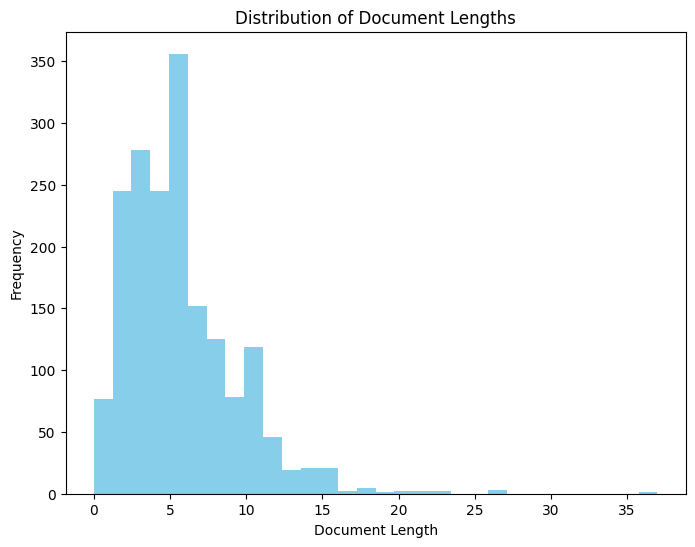

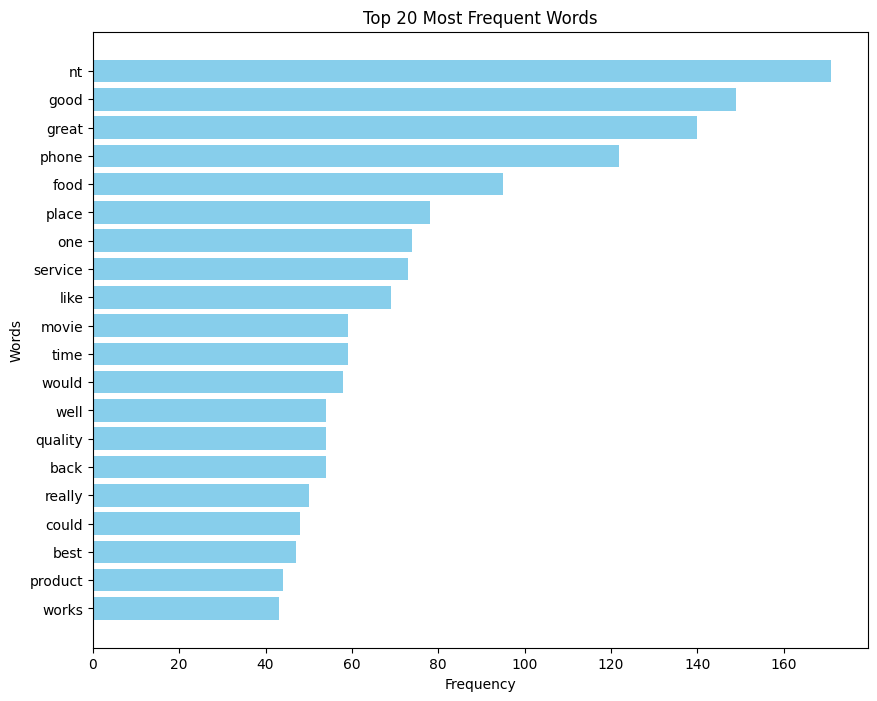

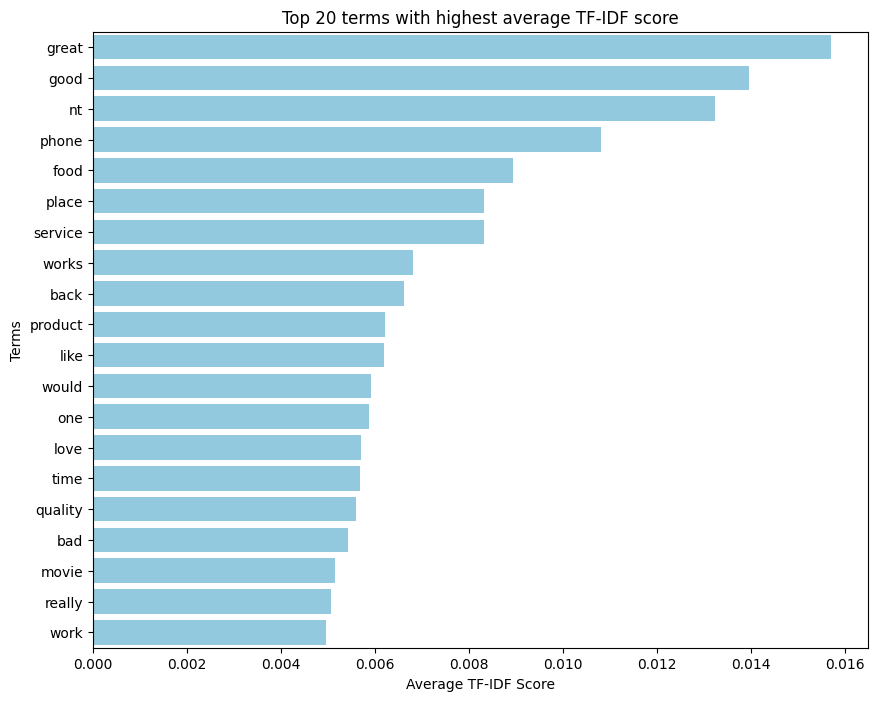

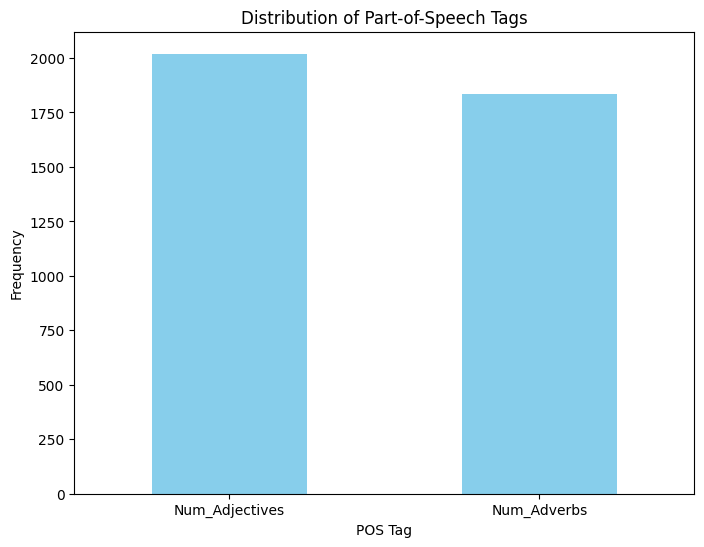

In [30]:
# EDA Script 1: Visualize the distribution of document lengths
import matplotlib.pyplot as plt

doc_lengths = X_train_cleaned.apply(lambda x: len(x.split()))
plt.figure(figsize=(8,6))
plt.hist(doc_lengths, bins=30, color='skyblue')
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.show()

# EDA Script 2: Word Frequency Analysis
from collections import Counter

# Flatten all the cleaned text into a list of words
all_words = [word for text in X_train_cleaned for word in text.split()]
word_freq = Counter(all_words)

# Plot the most common words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()
plt.show()

# EDA Script 3: Visualize the distribution of TF-IDF values
import seaborn as sns

tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_means = tfidf_df.mean(axis=0).sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 8))
sns.barplot(x=tfidf_means.values, y=tfidf_means.index, color='skyblue')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Terms')
plt.title('Top 20 terms with highest average TF-IDF score')
plt.show()

# EDA Script 4: POS Tag Distribution
pos_counts = pos_features.sum(axis=0)
plt.figure(figsize=(8, 6))
pos_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Part-of-Speech Tags')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


## Part 1.b: Model Training/Tuning/Cross Validation

Use your favorite shallow ML algorithm (such as decision trees, KNN, random forest, boosting variants) to train a classification model.  Don’t forget everything we’ve learned in the machine learning course: hyperparameter tuning, cross-validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing model that you can.


In [9]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import joblib

# Prepare classifiers
log_reg = LogisticRegression(random_state=42, max_iter=100)
dtree = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5)
bagging = BaggingClassifier(estimator=dtree, n_estimators=5, random_state=42)
boosting = AdaBoostClassifier(n_estimators=50, random_state=42)
xgboost = XGBClassifier(objective='binary:logistic', random_state=42)

# Define an objective function to be minimized.
def objective(trial):
    # Hyperparameter setting
    xgb_params = {
        'max_depth': trial.suggest_int('xgb__max_depth', 3, 10),
        'learning_rate': trial.suggest_float('xgb__learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('xgb__n_estimators', 50, 150),
        'scale_pos_weight': trial.suggest_categorical('xgb__scale_pos_weight', [1, sum(y_train == 0) / sum(y_train == 1)])
    }

    xgb = XGBClassifier(**xgb_params, random_state=42)

    # Stack classifiers including the tuned XGBoost
    estimators = [
        ('rf', dtree),
        ('bg', bagging),
        ('adb', boosting),
        ('xgb', xgb)  # Use the tuned XGBoost
    ]
    stacking_clf = StackingClassifier(estimators=estimators, final_estimator=log_reg, stack_method='auto', n_jobs=-1)

    # Cross-validation scores
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(stacking_clf, X_train_features, y_train, cv=kf, scoring='accuracy')

    return scores.mean()

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best trial
trial = study.best_trial
print(f'Accuracy: {trial.value}')
print("Best hyperparameters: {}".format(trial.params))

# Rebuild the model with the best parameters
xgb_best = XGBClassifier(**trial.params, objective='binary:logistic', random_state=42)
stacking_clf_best = StackingClassifier(estimators=[
        ('rf', dtree),
        ('bg', bagging),
        ('adb', boosting),
        ('xgb', xgb_best)
    ], final_estimator=log_reg, stack_method='auto', n_jobs=-1)

# Fit the best model
stacking_clf_best.fit(X_train_features, y_train)


# Save the model to disk
joblib.dump(stacking_clf_best, 'stacking_clf_best.joblib')

# Validate model
y_pred = stacking_clf_best.predict(X_val_features)
y_proba = stacking_clf_best.predict_proba(X_val_features)[:, 1]



[I 2024-04-20 12:56:19,583] A new study created in memory with name: no-name-489ba127-a7e6-4428-8a22-1606b8156545
[I 2024-04-20 13:02:23,128] Trial 0 finished with value: 0.7350000000000001 and parameters: {'xgb__max_depth': 6, 'xgb__learning_rate': 0.06513627191334351, 'xgb__n_estimators': 150, 'xgb__scale_pos_weight': 1}. Best is trial 0 with value: 0.7350000000000001.
[I 2024-04-20 13:07:40,593] Trial 1 finished with value: 0.7327777777777779 and parameters: {'xgb__max_depth': 8, 'xgb__learning_rate': 0.052047965433896566, 'xgb__n_estimators': 117, 'xgb__scale_pos_weight': 1}. Best is trial 0 with value: 0.7350000000000001.
[I 2024-04-20 13:13:37,929] Trial 2 finished with value: 0.7422222222222222 and parameters: {'xgb__max_depth': 8, 'xgb__learning_rate': 0.07316386510863222, 'xgb__n_estimators': 147, 'xgb__scale_pos_weight': 0.978021978021978}. Best is trial 2 with value: 0.7422222222222222.
[I 2024-04-20 13:19:02,014] Trial 3 finished with value: 0.7311111111111112 and parameter

Accuracy: 0.7483333333333333
Best hyperparameters: {'xgb__max_depth': 8, 'xgb__learning_rate': 0.08991829913718742, 'xgb__n_estimators': 149, 'xgb__scale_pos_weight': 1}


In [10]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score , classification_report, confusion_matrix

# Evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='binary')
roc_auc = roc_auc_score(y_val, y_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.7833333333333333
Precision: 0.7692307692307693
Recall: 0.7581227436823105
F1-Score: 0.7636363636363637
ROC-AUC: 0.8645203473751271


## Part 1.c: Model Assessment

Use your model to predict the sentiment of the testing data. Measure the performance (e.g., accuracy, AUC, F1-score) of your model.

In [12]:
# DO NOT MODIFY THIS CELL

test_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1taoTluPBUMt9JkKAnlqDTrU49DJFpJGW")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [23]:
# Apply the clean_text function to clean the test data
test_df['cleaned_text'] = test_df['Sentence'].apply(clean_text)

# Transform the cleaned test text using the previously fitted TfidfVectorizer
X_test_tfidf = vectorizer.transform(test_df['cleaned_text'])

# Extract POS features from the test data
pos_features_test = pd.DataFrame(test_df['cleaned_text'].apply(extract_pos_features).tolist(), columns=['Num_Adjectives', 'Num_Adverbs'])

# Combine TF-IDF features with POS features for the test set
X_test_features = pd.concat([pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out()), pos_features_test], axis=1)

# Ensure all feature names are strings to avoid sklearn processing errors
X_test_features.columns = X_test_features.columns.astype(str)

# Now, you can use the model to predict the transformed test data
try:
    y_test_pred = stacking_clf_best.predict(X_test_features)
    y_test_proba = stacking_clf_best.predict_proba(X_test_features)[:, 1]

    # Calculate and print metrics
    accuracy = accuracy_score(test_df['Polarity'], y_test_pred)
    precision = precision_score(test_df['Polarity'], y_test_pred)
    recall = recall_score(test_df['Polarity'], y_test_pred)
    f1 = f1_score(test_df['Polarity'], y_test_pred)
    roc_auc = roc_auc_score(test_df['Polarity'], y_test_proba)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC: {roc_auc}")
except Exception as e:
    print(f"An error occurred: {e}")


Accuracy: 0.6933333333333334
Precision: 0.7471264367816092
Recall: 0.6230031948881789
F1 Score: 0.6794425087108015
ROC AUC: 0.7799646001936972


## Part 2: Given the performance of your model, are you satisfied with the results? Explain.

Keep your response to 1000 characters or less.

The model's performance, while reasonable, calls for improvement. Accuracy (69.33%) and precision (74.71%) are decent, yet a low recall (62.30%) suggests missed positive sentiments. An F1 score of 67.94% and ROC AUC of 77.99% reveal potential for growth. To bolster the model's capabilities, advanced NLP features, refined tuning, and diverse ensemble methods are recommended. The aim is to enhance understanding and predictive accuracy, with these results guiding targeted enhancements.

## Part 3: Show five test instances in which your model was incorrect. Dive deep and find out why your model was wrong.

Keep your response to 1000 characters or less.

In [20]:
##Step 1: Identify Misclassified Instances

# Add predictions to the test dataframe
test_df['predicted_polarity'] = y_test_pred

# Find instances where the predicted polarity does not match the actual polarity
misclassified = test_df[test_df['Polarity'] != test_df['predicted_polarity']]


In [21]:
#Step 2: Display Five Misclassified Instances
# Randomly sample 5 misclassified instances for analysis
misclassified_samples = misclassified.sample(n=5, random_state=42)
print(misclassified_samples)

                                              Sentence  Polarity  \
87   Lifetime does not air it enough, so if anyone ...         1   
178  With the originality and freshness of the firs...         0   
531  I do not know if this was Emilio Estevez's dir...         1   
394                Predictable, but not a bad watch.           1   
505  One of the most boring,pointless movies I have...         0   

                                          cleaned_text  predicted_polarity  
87   lifetime air enough anyone knows store sells l...                   0  
178  originality freshness first movie spent remake...                   1  
531  know emilio estevez directorial debut pacing i...                   0  
394                              predictable bad watch                   0  
505              one boring pointless movies ever seen                   1  



- Index 87: Mixed sentiments with negative ("not air enough") and strong positive desire ("must-have"). The model likely missed the key positive phrase.
- Index 178: Sentence carries a negative sentiment ("little else to offer") despite positive words ("originality", "freshness"). Model might have misinterpreted the positive words.
- Index 531: Uncertainty in recognizing Estevez's role (negative) contrasts with praise for film elements (positive). Complexity may have confused the model.
- Index 394: "Predictable" hints at negative sentiment but is mitigated by "not a bad watch" (mildly positive). Model may have overemphasized the word "Predictable".
- Index 505: Clearly negative sentiment misclassified as positive. Possible reasons: training data imbalance or misinterpretation of "one of the most".

# Question 2: Conceptual Understanding of the SOTA


**Marking**

The following questions will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


## Part 1: What is transfer learning and fine-tuning in NLP? What advantages does it have over training from scratch?


In the domain of NLP, transfer learning is a strategic approach where we utilize a model pre-trained on extensive datasets and tailor it to our specific needs. Fine-tuning further refines this process by adjusting the model to the intricacies of our targeted task. This methodology stands out for its efficiency, requiring significantly less time and data to achieve high-quality outcomes compared to traditional models built from the ground up. It leverages the foundational language understanding already embedded in the pre-trained model, providing a robust starting point and facilitating enhanced performance, even in data-scarce scenarios. This approach not only streamlines the development process but also amplifies the potential for innovative solutions in the field of NLP.

characters: 789

## Part 2: What is a Large Language Model (LLM) and what are their strengths and weaknesses?


A Large Language Model (LLM) excels in generating human-like text, understanding context, and performing diverse tasks in natural language. Strengths include their versatility across various applications, deep language understanding, and adaptability to specific domains via fine-tuning. However, LLMs face challenges like data bias, which can perpetuate ethical issues, and interpretability problems, complicating error analysis. They also demand significant computational resources, impacting accessibility and the environment. Despite their proficiency, LLMs can sometimes produce inaccurate or nonsensical outputs, especially in complex situations.

# Question 3 (Optional/Bonus): Sentiment Analysis via Deep ML

This question is optional and is worth up to 5 extra credit marks.

Use deep learning (e.g., RNNs and variants, CNNs and variants, and/or transformers) to build a model on the same dataset as Q1 and compare the results with the Shallow ML model.

You may train your own deep ML model (using, e.g., the keras library) or fine-tune a pretrained deep ML model (using, e.g., the transformers library and the Huggingface ecoystem).

In [4]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1b8MAiN-xBdk6scM-DnufkuijDZivZJqM")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [5]:
# DO NOT MODIFY THIS CELL

# Next, we'll split it into training and test
from sklearn.model_selection import train_test_split

X = df['Sentence']
y = df['Polarity']

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

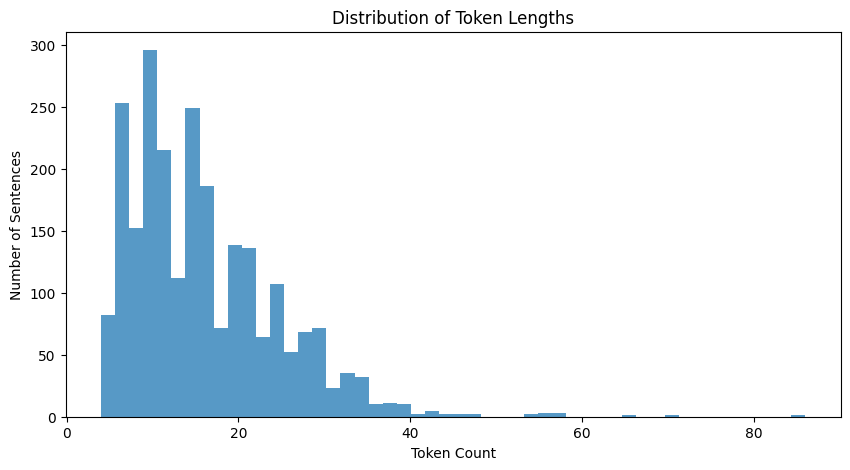

Percentiles:
90% of the lengths are below: 28.0
95% of the lengths are below: 32.0
99% of the lengths are below: 40.00999999999976


In [10]:
import matplotlib.pyplot as plt

# Assuming 'tokenizer' is already loaded as DistilBertTokenizerFast
def compute_length(texts):
    return [len(tokenizer.encode(text, add_special_tokens=True)) for text in texts]

# Compute lengths
lengths = compute_length(X)

# Plotting the distribution of lengths
plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=50, alpha=0.75)
plt.title('Distribution of Token Lengths')
plt.xlabel('Token Count')
plt.ylabel('Number of Sentences')
plt.show()

# Analyze the percentiles to choose a max_length
import numpy as np
print("Percentiles:")
print("90% of the lengths are below:", np.percentile(lengths, 90))
print("95% of the lengths are below:", np.percentile(lengths, 95))
print("99% of the lengths are below:", np.percentile(lengths, 99))


In [11]:
from datasets import Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments

# Load the tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Function to tokenize the dataset
def tokenize_function(examples):
    # Now using max_length of 40 as determined from the percentile analysis
    return tokenizer(
        examples['Sentence'],
        padding="max_length",
        truncation=True,
        max_length=40  # Using the 99th percentile value
    )

# Convert the Pandas dataframes to Hugging Face dataset format
train_dataset = Dataset.from_pandas(df.iloc[X_train.index])
val_dataset = Dataset.from_pandas(df.iloc[X_val.index])

# Apply the tokenize function and remove original columns
train_dataset = train_dataset.map(tokenize_function, batched=True, remove_columns=['Sentence', 'Polarity'])
val_dataset = val_dataset.map(tokenize_function, batched=True, remove_columns=['Sentence', 'Polarity'])

# Add a column for labels which is required by Hugging Face Trainer
train_dataset = train_dataset.add_column("labels", y_train.tolist())
val_dataset = val_dataset.add_column("labels", y_val.tolist())


Map:   0%|          | 0/1800 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

In [12]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install accelerate -U transformers[torch] -U

In [13]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

In [14]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Start training
trainer.train()


Step,Training Loss
10,0.697500
20,0.699400
30,0.688400
40,0.693100
50,0.686500
60,0.673100
70,0.671000
80,0.647900
90,0.556200
100,0.462500


TrainOutput(global_step=339, training_loss=0.3216411561037587, metrics={'train_runtime': 24.913, 'train_samples_per_second': 216.754, 'train_steps_per_second': 13.607, 'total_flos': 55884683808000.0, 'train_loss': 0.3216411561037587, 'epoch': 3.0})

In [15]:
#Step 6: Evaluation
#Evaluate the model on the validation set to see how well it performs.


results = trainer.evaluate()
print(results)


{'eval_loss': 0.2447122186422348, 'eval_runtime': 0.6715, 'eval_samples_per_second': 893.463, 'eval_steps_per_second': 14.891, 'epoch': 3.0}


In [16]:
#Step 7: Save the Model
#After training, you may want to save the model and the tokenizer for later use.

model_path = "./sentiment-distilbert-model"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)



('./sentiment-distilbert-model/tokenizer_config.json',
 './sentiment-distilbert-model/special_tokens_map.json',
 './sentiment-distilbert-model/vocab.txt',
 './sentiment-distilbert-model/added_tokens.json',
 './sentiment-distilbert-model/tokenizer.json')

In [17]:
# Get predictions
predictions = trainer.predict(val_dataset)

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

# Extract logits
logits = predictions.predictions

# Convert logits to probabilities using softmax
probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

# Extract predicted labels
predicted_labels = np.argmax(logits, axis=1)

# Extract True labels
true_labels = np.array(val_dataset["labels"])


In [19]:
# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

# AUC - This metric is only meaningful for binary classification tasks
if len(np.unique(true_labels)) == 2:
    auc = roc_auc_score(true_labels, probabilities[:, 1])  # Probabilities for the positive class
    print(f"AUC: {auc}")
else:
    print("AUC is not applicable for non-binary classification tasks.")

# F1-Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' to handle imbalanced classes
print(f"F1-Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9333333333333333
AUC: 0.9788534832515563
F1-Score: 0.9333154410449096
Confusion Matrix:
[[304  19]
 [ 21 256]]


In [20]:
from sklearn.metrics import classification_report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       323
           1       0.93      0.92      0.93       277

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



## Model Assessment

In [22]:
# DO NOT MODIFY THIS CELL

test_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1taoTluPBUMt9JkKAnlqDTrU49DJFpJGW")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [23]:
from datasets import Dataset
from transformers import DistilBertTokenizerFast
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report, confusion_matrix

# Assuming 'tokenizer' and 'trainer' are already loaded

# Tokenize the test set
def tokenize_function(examples):
    return tokenizer(
        examples['Sentence'],
        padding="max_length",
        truncation=True,
        max_length=40  # Ensure this matches the max_length used during training
    )

# Convert the test dataframe to a Hugging Face dataset format
test_dataset = Dataset.from_pandas(test_df)

# Apply the tokenize function and remove original columns
test_dataset = test_dataset.map(tokenize_function, batched=True, remove_columns=['Sentence'])

# Predict using the trained model
test_predictions = trainer.predict(test_dataset)

# Extract logits from the predictions
test_logits = test_predictions.predictions

# Convert logits to probabilities using softmax
test_probabilities = np.exp(test_logits) / np.sum(np.exp(test_logits), axis=1, keepdims=True)

# Extract predicted labels
test_predicted_labels = np.argmax(test_logits, axis=1)

# Assuming you have true labels in your test data for evaluation

# Extract true labels
test_true_labels = test_df['Polarity'].to_numpy()

# Calculate accuracy
test_accuracy = accuracy_score(test_true_labels, test_predicted_labels)
print(f"Test Accuracy: {test_accuracy}")

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(test_true_labels, test_predicted_labels, average='binary')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Calculate ROC-AUC
test_auc = roc_auc_score(test_true_labels, test_probabilities[:, 1])  # Probabilities for the positive class
print(f"Test AUC: {test_auc}")

# Print classification report
print("Classification Report:")
print(classification_report(test_true_labels, test_predicted_labels))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_true_labels, test_predicted_labels))


Map:   0%|          | 0/600 [00:00<?, ? examples/s]

Test Accuracy: 0.8983333333333333
Precision: 0.9315068493150684, Recall: 0.8690095846645367, F1-Score: 0.8991735537190082
Test AUC: 0.9617058699112779
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       287
           1       0.93      0.87      0.90       313

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600

Confusion Matrix:
[[267  20]
 [ 41 272]]
